In [2]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
sns.set_theme(style="whitegrid")
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

In [3]:
path1 = pd.read_excel("/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/tables/final/mm10.unmerged_peaks.11_6_23.hp.xlsx")
path2 = pd.read_excel("/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/tables/final/mm10.unmerged_peaks.11_6_23.cp.xlsx")
path3 = pd.read_excel("/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/tables/final/hg38.unmerged_peaks.11_6_23.hp.xlsx")
path4 = pd.read_excel("/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/tables/final/hg38.unmerged_peaks.11_6_23.cp.xlsx")
#path3 = pd.read_excel("/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/tables/final/mm10.unmerged_loops.11_3_23.hiccups.xlsx")

path1 = path1.drop(columns = "Index")
path2 = path2.drop(columns = "Index")
path3 = path3.drop(columns = "Index")
path4 = path4.drop(columns = "Index")
#path3 = path3.drop(columns = "Unnamed: 0")

In [13]:
path4.to_csv("results/tables/final/hg38.unmerged_peaks.11_6_23.cp.tsv", index = False, sep = "\t")

# Helper Functions

#### read fithichip loops files

In [2]:
def read_loop_files(file):
    loop_count = 0
    with open(file) as fr:
        loop_count = len(fr.readlines())
    return(loop_count)

In [3]:
# caller = 'fithichip' or 'hiccups'
# loop_type = 'chipseq.peaks', 'hichip-peaks.peaks', 'fithichip-peaks'
# config = 'L5', 'L10', 'L25', 'S5', 'S10', 'S25'
def get_loop_path(caller, loop_type, sample_name, config):
    path=''
    if caller == 'fithichip':
        if config[0] == 'L':
            path='results/loops/fithichip/{sn}_{lt}/{c}/FitHiChIP_Peak2ALL_b{c1}000_L20000_U2000000/P2PBckgr_0/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-{c}.interactions_FitHiC_Q0.01.bed'.format(sn = sample_name, lt = loop_type, c = config, c1 = config[1:])  
        if config[0] == 'S':
            path='results/loops/fithichip/{sn}_{lt}/{c}/FitHiChIP_Peak2ALL_b{c1}000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-{c}.interactions_FitHiC_Q0.01.bed'.format(sn = sample_name, lt = loop_type, c = config, c1 = config[1:])  
            
    if caller == 'hiccups':
            path = 'results/loops/hiccups/whole_genome/{sn}/postprocessed_pixels_{c}000.bedpe'.format(sn = sample_name, c = config)

    return(path) 

In [4]:
# caller = 'fithichip' or 'hiccups'
# loop_type = 'chipseq.peaks', 'hichip-peaks.peaks', 'fithichip-peaks'
# config = 'L5', 'L10', 'L25', 'S5', 'S10', 'S25'
def get_loop_path_hg38(caller, loop_type, sample_name, config):
    path=''
    if caller == 'fithichip':
        if config[0] == 'L':
            path='results/loops/fithichip/{sn}_{lt}/{c}/FitHiChIP_Peak2ALL_b{c1}000_L20000_U2000000/P2PBckgr_0/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-{c}.interactions_FitHiC_Q0.01.bed'.format(sn = sample_name, lt = loop_type, c = config, c1 = config[1:])  
        if config[0] == 'S':
            path='results/loops/fithichip/{sn}_{lt}/{c}/FitHiChIP_Peak2ALL_b{c1}000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-{c}.interactions_FitHiC_Q0.01.bed'.format(sn = sample_name, lt = loop_type, c = config, c1 = config[1:])  
            
    if caller == 'hiccups':
            path = 'results/loops/hiccups/whole_genome/{sn}/postprocessed_pixels_{c}000.bedpe'.format(sn = sample_name, c = config)

    return(path) 

#### chipseq peak files

In [5]:
def read_peaks_files(file):
    peak_count = 0
    with open(file) as fr:
        peak_count = len(fr.readlines())
    return(peak_count)

In [6]:
def get_peaks_path(sample_name, peak_type, genome):
    path=''
    if genome == "chm13":
        samplesheet = 'results/samplesheets/post-hicpro/human_t2t_biorep_merged.peaks_files.samplesheet.without_header.tsv'
    elif genome == "hg38":
        samplesheet = 'results/samplesheets/post-hicpro/human.10.23.23.hichip-peaks_not_updated.peaks_files.samplesheet.without_header.tsv'
    else:
        samplesheet = 'results/samplesheets/post-hicpro/mouse.10.23.23.merged_chipline_not_updated.peaks_files.samplesheet.without_header.tsv'        
        
    with open(samplesheet) as fr:
        if peak_type == 'chipseq':
            for line in fr:
                if sample_name in line:
                    info = line.strip().split()
                    path = info[4]
        if peak_type == 'fithichip':
            for line in fr:
                if sample_name in line:
                    info = line.strip().split()
                    path = info[3]
        if peak_type == 'hichip_peaks':
            for line in fr:
                if sample_name in line:
                    info = line.strip().split()
                    path = info[2]
    return(path) 

#### generate pandas dataframe 

In [7]:
org = "Homo"

In [8]:
if org == "Mus":
    hiccups_samples = list(pd.read_csv("results/loops/sample_lists/mm10.hiccups_samples.txt", header = None)[0])
    fithichip_chipseq_samples = list(pd.read_csv("results/loops/sample_lists/mm10.fithichip_chipseq_samples.txt", header = None)[0])
    fithichip_fithichip_samples = list(pd.read_csv("results/loops/sample_lists/mm10.fithichip_fithichip_samples.txt", header = None)[0])
    fithichip_hichip_peaks_samples = list(pd.read_csv("results/loops/sample_lists/mm10.fithichip_hichip-peaks_samples.txt", header = None)[0])
elif org == "Homo":
    hiccups_samples = list(pd.read_csv("results/loops/sample_lists/hg38.hiccups_samples.txt", header = None)[0])
    fithichip_chipseq_samples = list(pd.read_csv("results/loops/sample_lists/hg38.fithichip_chipseq_samples.txt", header = None)[0])
    fithichip_fithichip_samples = list(pd.read_csv("results/loops/sample_lists/hg38.fithichip_fithichip_samples.txt", header = None)[0])
    fithichip_hichip_peaks_samples = list(pd.read_csv("results/loops/sample_lists/hg38.fithichip_hichip-peaks_samples.txt", header = None)[0])    

In [9]:
hiccups_missing = []
fithichip_chipseq_missing = []
fithichip_fithichip_missing = []
fithichip_hichip_peaks_missing = []

In [10]:
## hiccups

def generate_hi_df(org):
    data = []
    glob_str = glob.glob('results/hicpro/*' + org + '*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)
        
        ## HiCCUPS
        for config in ['5', '10', '25']:
            path = get_loop_path_hg38('hiccups', 'none', sample_name, config)
            
            if sample_name in hiccups_samples:
                try:
                    p = open(path)
                except OSError as e:
                    #sample = str(e).strip().split("/")[10]
                    #print(sample)
                    print(e)
                    hiccups_missing.append(sample)
            
            if os.path.exists(path) and os.stat(path).st_size != 0:
                loop_info = read_loop_files(path)
                sample_info.append(loop_info - 2)
            else:
                sample_info.append(-1)
     
        data.append(sample_info)
   
    hi_df = pd.DataFrame(data)
    return hi_df

In [11]:
hi_df = generate_hi_df(org)

In [12]:
hi_df

,0,1,2,3
0,A673_WT.GSE133227.Homo_Sapiens.CTCF.b1,-1,-1,-1
1,H520.GSE166232.Homo_Sapiens.H3K27ac.b1,-1,-1,-1
2,MB157-WO.GSE116869.Homo_Sapiens.SMC1A.b1,699,2709,13472
3,Nonclassical_Monocyte_1815.phs001703v4p1.Homo_Sapiens.H3K27ac.b2,-1,-1,-1
4,CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,-1,-1,-1
5,SNU16-dCas9-KRAB.GSE159985.Homo_Sapiens.H3K27ac.b1,-1,-1,-1
6,cbCD34+-HSPC-SJAUL068292-D1.GSE165207.Homo_Sapiens.H3K27ac.b1,3004,4108,4440
7,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF.b1,-1,-1,-1
8,DCM_7.GSE165303.Homo_Sapiens.H3K27ac.b1,-1,-1,-1
9,DND41-DMSO.GSE173871.Homo_Sapiens.SMC1A.b2,-1,-1,-1


In [13]:
len(hi_df.loc[hi_df[1] != -1])

146

In [14]:
## fithichip, chipseq peaks

def generate_fcs_df(org):
    data = []
    glob_str = glob.glob('results/hicpro/*' + org + '*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)
        
#         # Chip-seq peaks chm13
#         path = get_peaks_path(sample_name, 'chipseq', 'chm13')
#         if os.path.exists(path):
#             peak_info = read_peaks_files(path)
#             sample_info.append(peak_info)
#         else:
#             sample_info.append('n/a')
            
        
#         ## FitHiChIP Loops, chipseq chm13
                
#         for config in ["S5", "L5", "S10", "L10", "S25", "L25"]:
#             path = get_loop_path('fithichip', 'chipseq.peaks', sample_name, config)
            
#             if os.path.exists(path) and os.stat(path).st_size != 0:
#                 loop_info = read_loop_files(path)
#                 sample_info.append(loop_info - 1)
#             else:
#                 sample_info.append(0)
                
            
        
         ## Chip-seq peaks hg38
        if org == "Mus":
            genome = "mm10"
        elif org == "Homo":
            genome = "hg38"
        path = get_peaks_path(sample_name, 'chipseq', genome)
    
        if os.path.exists(path):
            peak_info = read_peaks_files(path)
            sample_info.append(peak_info)
        else:
            sample_info.append(-1)
            
        
        ## FitHiChIP Loops, chipseq hg38
                
        for config in ["S5", "L5", "S10", "L10", "S25", "L25"]:
            path = get_loop_path_hg38('fithichip', 'chipseq.peaks', sample_name, config)
            
            name = sample_name + "_chipseq.peaks"
            if name in fithichip_chipseq_samples:
                try:
                    p = open(path)
                except OSError as e:
                    sample = str(e).strip().split("/")[3]
                    print(sample)
                    fithichip_chipseq_missing.append(sample)   
            
            #if os.path.exists(path) and os.stat(path).st_size != 0:
            if os.path.exists(path):
                if os.stat(path).st_size != 0:
                    loop_info = read_loop_files(path)
                    sample_info.append(loop_info - 1)
                else:
                    sample_info.append(0)  
            else:
                sample_info.append(-1)            
        
        data.append(sample_info)
   
    fcs_df = pd.DataFrame(data)
    return fcs_df

In [15]:
fcs_df = generate_fcs_df(org)

In [16]:
fcs_df.sort_values(by = 0)

,0,1,2,3,4,5,6,7
175,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,90971,0,0,0,0,0,0
127,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,93587,0,0,0,0,0,3
225,293T.GSE128106.Homo_Sapiens.YY1.b1,119725,0,0,0,0,0,0
449,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,115154,177,393,2800,6010,30157,51884
377,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,115154,35,65,570,1284,9008,16829
99,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,102935,11,23,734,1745,22242,39397
230,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,102935,3,7,123,295,7040,13616
312,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,104318,3,3,56,93,8455,14863
313,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,104318,4,4,10,17,3662,6444
481,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,-1,-1,-1,-1,-1,-1,-1


In [17]:
fcs_df.loc[fcs_df[2] == -1].loc[fcs_df[1] != -1] 

,0,1,2,3,4,5,6,7


In [18]:
len(fcs_df.loc[fcs_df[1] != -1])

243

In [19]:
fithichip_chipseq_missing

[]

In [20]:
## fithichip, hichip-peaks

def generate_hp_df(org):
    data = []
    glob_str = glob.glob('results/hicpro/*' + org + '*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)                
        
         ## HP peaks
        path = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/hichip-peaks/{s}/out_peaks.bed'.format(s = sample_name)
        if os.path.exists(path):
            peak_info = read_peaks_files(path)
            sample_info.append(peak_info)
        else:
            sample_info.append(-1)
            
            
        ## FitHiChIP Loops, hichip-peaks
                
        for config in ["S5", "L5", "S10", "L10", "S25", "L25"]:
            path = get_loop_path_hg38('fithichip', 'hichip-peaks.peaks', sample_name, config)
            
            name = sample_name + '_hichip-peaks.peaks'
            if name in fithichip_hichip_peaks_samples:
                try:
                    p = open(path)
                except OSError as e:
                    sample = str(e).strip().split("/")[3]
                    print(sample)
                    fithichip_hichip_peaks_missing.append(sample)   
            
#             if sample_name == "VCaP-AU-4h.GSE171591.Homo_Sapiens.CTCF.b1":
#                 print(sample_name)
#                 print(path)
#                 print(os.path.exists(path))
#                 print(os.stat(path).st_size != 0)
            
            if os.path.exists(path):
                if os.stat(path).st_size != 0:
                    loop_info = read_loop_files(path)
                    sample_info.append(loop_info - 1)
                else:
                    sample_info.append(0)                    
            else:
                sample_info.append(-1)
        
        data.append(sample_info)
   
    hp_df = pd.DataFrame(data)
    return hp_df

In [21]:
hp_df = generate_hp_df(org)

In [22]:
hp_df.sort_values(by = 0)

,0,1,2,3,4,5,6,7
175,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,-1,0,0,0,0,0,0
127,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,-1,0,0,0,0,2,2
225,293T.GSE128106.Homo_Sapiens.YY1.b1,-1,0,0,0,0,238,2
449,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1,31,349,412,2696,2533,9825
377,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1,6,80,123,994,1328,5859
99,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1,3,30,50,530,703,2944
230,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1,3,8,38,227,672,3195
312,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1,0,2,0,21,0,121
313,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1,0,2,0,6,0,61
481,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,-1,3747,12292,10675,35490,25651,69659


In [25]:
len(hp_df.loc[hp_df[2] != -1])

478

In [14]:
hp_df.loc[hp_df[2] == -1]

NameError: name 'hp_df' is not defined

In [27]:
## fithichip, fithichip peaks

def generate_f_df(org):
    data = []
    glob_str = glob.glob('results/hicpro/*' + org + '*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)
        
#          # Fithichip peaks chm13
#         path = get_peaks_path(sample_name, 'fithichip', 'chm13')
#         if os.path.exists(path):
#             peak_info = read_peaks_files(path)
#             sample_info.append(peak_info)
#         else:
#             sample_info.append(0)
            
            
#         ## FitHiChIP Loops, fithichip chm13
                
#         for config in ["S5", "L5", "S10", "L10", "S25", "L25"]: #"S5", "L5", "S25", "L25"
#             path = get_loop_path('fithichip', 'fithichip.peaks', sample_name, config)
            
#             if os.path.exists(path) and os.stat(path).st_size != 0:
#                 loop_info = read_loop_files(path)
#                 sample_info.append(loop_info - 1)
#             else:
#                 sample_info.append(0)
        
        ## Fithichip peaks hg38
        path = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/fithichip/{s}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(s = sample_name)
        if os.path.exists(path):
            peak_info = read_peaks_files(path)
            sample_info.append(peak_info)
        else:
            sample_info.append(-1)
            
            
        ## FitHiChIP Loops, fithichip hg38
    
        for config in ["S5", "L5", "S10", "L10", "S25", "L25"]: #"S5", "L5", "S25", "L25"
            path = get_loop_path_hg38('fithichip', 'fithichip.peaks', sample_name, config)
            
            name = sample_name + '_fithichip.peaks'
            if name in fithichip_fithichip_samples:
                try:
                    p = open(path)
                except OSError as e:
                    sample = str(e).strip().split("/")[3]
                    print(sample)
                    fithichip_fithichip_missing.append(sample)  
            
            if os.path.exists(path):
                if os.stat(path).st_size != 0:
                    loop_info = read_loop_files(path)
                    sample_info.append(loop_info - 1)
                else:
                    sample_info.append(0)
            else:
                sample_info.append(-1)
        
        data.append(sample_info)
   
    f_df = pd.DataFrame(data)
    return f_df

In [28]:
f_df = generate_f_df(org)

In [29]:
f_df.sort_values(by=0).reset_index(drop=True)

,0,1,2,3,4,5,6,7
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,29430,0,0,0,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,73184,0,0,0,0,3,5
2,293T.GSE128106.Homo_Sapiens.YY1.b1,987,0,0,0,0,0,0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,11489,47,346,776,3989,8323,24510
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,10428,7,58,148,990,2518,9413
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,7761,4,29,186,1111,4839,15127
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,23228,3,6,71,260,3720,9577
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,9018,3,4,39,94,2688,5674
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,27484,5,5,16,23,2398,4350
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,60295,3514,11200,11313,34768,33321,79208


In [30]:
f_df.loc[f_df[2] == -1]

,0,1,2,3,4,5,6,7
14,VCaP-DMSO-4h.GSE171591.Homo_Sapiens.H3K27ac.b1,-1,-1,-1,-1,-1,-1,-1
43,VCaP-AU-4h.GSE171591.Homo_Sapiens.H3K27ac.b1,-1,-1,-1,-1,-1,-1,-1
119,T47D-T30.GSE179666.Homo_Sapiens.PGR.b1,-1,-1,-1,-1,-1,-1,-1
197,VCaP-DMSO-4h.GSE171591.Homo_Sapiens.CTCF.b1,-1,-1,-1,-1,-1,-1,-1
208,T47D-T0.GSE179666.Homo_Sapiens.PGR.b1,-1,-1,-1,-1,-1,-1,-1
220,VCaP-DMSO-4h.GSE171591.Homo_Sapiens.H3K4me3.b1,-1,-1,-1,-1,-1,-1,-1
276,VCaP-AU-4h.GSE171591.Homo_Sapiens.CTCF.b1,-1,-1,-1,-1,-1,-1,-1
280,VCaP-AU-4h.GSE171591.Homo_Sapiens.H3K4me3.b1,-1,-1,-1,-1,-1,-1,-1


In [31]:
len(f_df.loc[f_df[2] != -1])

478

#### Check Lists Holding Broken Samples

In [32]:
for s in [hiccups_missing, fithichip_chipseq_missing, fithichip_fithichip_missing, fithichip_hichip_peaks_missing]:
    print("SET:")
    for element in set(s):
        print(element)
    print()

SET:

SET:

SET:

SET:



#### Merge DFs Into Master DF

In [33]:
def generate_df(hi_df, fcs_df, hp_df, f_df):
    df = hi_df.merge(fcs_df)
    df = df.merge(hp_df)
    df = df.merge(f_df)
    return df

In [34]:
#hi_df.columns = ['sample_name', "Hi.5", "Hi.10", "Hi.25"]
#fcs_df.columns = ['sample_name', "CP.chm13", "FCP.S5.chm13", "FCP.L5.chm13", "FCP.S10.chm13", "FCP.L10.chm13", "FCP.S25.chm13", "FCP.L25.chm13", "CP.hg38", "FCP.S5.hg38", "FCP.L5.hg38", "FCP.S10.hg38", "FCP.L10.hg38", "FCP.S25.hg38", "FCP.L25.hg38"]
#hp_df.columns = ['sample_name', "HPP", "FHPP.S5", "FHPP.L5", "FHPP.S10", "FHPP.L10", "FHPP.S25", "FHPP.L25"]
#f_df.columns = ['sample_name', "F.chm13", "FF.S5.chm13", "FF.L5.chm13", "FF.S10.chm13", "FF.L10.chm13", "FF.S25.chm13", "FF.L25.chm13", "F.hg38", "FF.S5.hg38", "FF.L5.hg38", "FF.S10.hg38", "FF.L10.hg38", "FF.S25.hg38", "FF.L25.hg38"]

hi_df.columns = ['sample_name', "Hi.5", "Hi.10", "Hi.25"]
fcs_df.columns = ['sample_name', "CP.mm10", "FCP.S5.mm10", "FCP.L5.mm10", "FCP.S10.mm10", "FCP.L10.mm10", "FCP.S25.mm10", "FCP.L25.mm10"]
hp_df.columns = ['sample_name', "HPP", "FHPP.S5", "FHPP.L5", "FHPP.S10", "FHPP.L10", "FHPP.S25", "FHPP.L25"]
f_df.columns = ['sample_name', "F.mm10", "FF.S5.mm10", "FF.L5.mm10", "FF.S10.mm10", "FF.L10.mm10", "FF.S25.mm10", "FF.L25.mm10"]

hi_df = hi_df.sort_values(by='sample_name').reset_index(drop=True)
fcs_df = fcs_df.sort_values(by='sample_name').reset_index(drop=True)
hp_df = hp_df.sort_values(by='sample_name').reset_index(drop=True)
f_df = f_df.sort_values(by='sample_name').reset_index(drop=True)

df = generate_df(hi_df, fcs_df, hp_df, f_df)

In [35]:
df

,sample_name,Hi.5,Hi.10,Hi.25,CP.mm10,FCP.S5.mm10,FCP.L5.mm10,FCP.S10.mm10,FCP.L10.mm10,FCP.S25.mm10,FCP.L25.mm10,HPP,FHPP.S5,FHPP.L5,FHPP.S10,FHPP.L10,FHPP.S25,FHPP.L25,F.mm10,FF.S5.mm10,FF.L5.mm10,FF.S10.mm10,FF.L10.mm10,FF.S25.mm10,FF.L25.mm10
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,-1,-1,-1,90971,0,0,0,0,0,0,-1,0,0,0,0,0,0,29430,0,0,0,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,-1,-1,-1,93587,0,0,0,0,0,3,-1,0,0,0,0,2,2,73184,0,0,0,0,3,5
2,293T.GSE128106.Homo_Sapiens.YY1.b1,-1,-1,-1,119725,0,0,0,0,0,0,-1,0,0,0,0,238,2,987,0,0,0,0,0,0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1,-1,-1,115154,177,393,2800,6010,30157,51884,-1,31,349,412,2696,2533,9825,11489,47,346,776,3989,8323,24510
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1,-1,-1,115154,35,65,570,1284,9008,16829,-1,6,80,123,994,1328,5859,10428,7,58,148,990,2518,9413
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1,-1,-1,102935,11,23,734,1745,22242,39397,-1,3,30,50,530,703,2944,7761,4,29,186,1111,4839,15127
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1,-1,-1,102935,3,7,123,295,7040,13616,-1,3,8,38,227,672,3195,23228,3,6,71,260,3720,9577
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1,-1,-1,104318,3,3,56,93,8455,14863,-1,0,2,0,21,0,121,9018,3,4,39,94,2688,5674
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1,-1,-1,104318,4,4,10,17,3662,6444,-1,0,2,0,6,0,61,27484,5,5,16,23,2398,4350
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3747,12292,10675,35490,25651,69659,60295,3514,11200,11313,34768,33321,79208


In [37]:
df.to_excel("results/tables/final/hg38.unmerged_loops.11_6_23.supplemental_table.xlsx")

#### Analysis

In [51]:
df_mouse = df.copy(deep=True)

In [25]:
df_human = df.copy(deep=True)

In [18]:
hi_df_copy = hi_df.copy(deep=True)
fcs_df_copy = fcs_df.copy(deep=True)
hp_df_copy = hp_df.copy(deep=True)
f_df_copy = f_df.copy(deep=True)

In [19]:
def set_status(row):
    if row['CP'] != 'n/a' and row['CP'] > 1000:
          return 1
    return 0

In [20]:
fcs_df_copy['Status'] = fcs_df_copy.apply(lambda row: set_status(row), axis=1)
fcs_df_copy = fcs_df_copy.loc[fcs_df_copy["Status"] == 1].reset_index(drop=True)
fcs_df_copy

,sample_name,CP,FCP.S5,FCP.L5,FCP.S10,FCP.L10,FCP.S25,FCP.L25,Status
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,19491,0,0,0,0,0,0,1
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,21727,0,0,0,0,0,3,1
2,293T.GSE128106.Homo_Sapiens.YY1.b1,21267,0,0,0,0,0,0,1
3,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779,12786,53896,28571,110387,64184,158929,1
4,BC1.GSE136090.Homo_Sapiens.H3K27ac.b1,13670,31,37,91,164,554,1343,1
5,BC3.GSE136090.Homo_Sapiens.H3K27ac.b1,12866,0,0,8,14,221,657,1
6,BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1,18843,519,1005,1129,3300,3293,10846,1
7,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,130219,40515,146863,75629,226532,133443,282327,1
8,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,85359,0,0,0,0,0,0,1
9,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,85359,0,0,0,0,0,0,1


In [21]:
fcs_df_copy.describe()

,FCP.S5,FCP.L5,FCP.S10,FCP.L10,FCP.S25,FCP.L25,Status
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0
mean,5928.182979,17667.191489,8227.370213,23736.919149,14956.910638,32431.148936,1.0
std,19924.034254,50375.811092,27222.462503,62388.120705,40736.114881,70687.564350,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,328.000000,787.000000,2108.500000,5571.500000,11514.500000,34558.500000,1.0
max,158091.000000,366779.000000,224772.000000,374924.000000,360056.000000,452160.000000,1.0


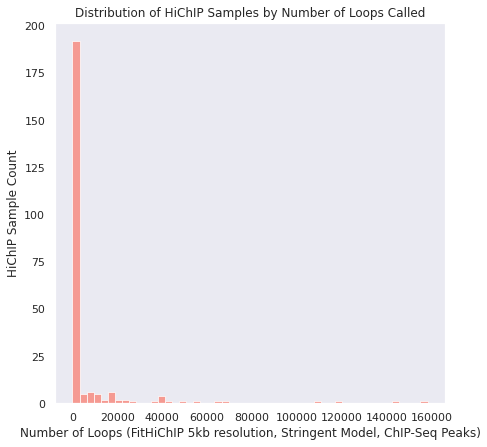

In [22]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.histplot(x="FCP.S5", data=fcs_df_copy, bins=50)
ax.set(xlabel='Number of Loops (FitHiChIP 5kb resolution, Stringent Model, ChIP-Seq Peaks)', ylabel='HiChIP Sample Count', title='Distribution of HiChIP Samples by Number of Loops Called')
fig = ax.get_figure()
fig.savefig('dist-num-loops-5kb.png', dpi=300) 

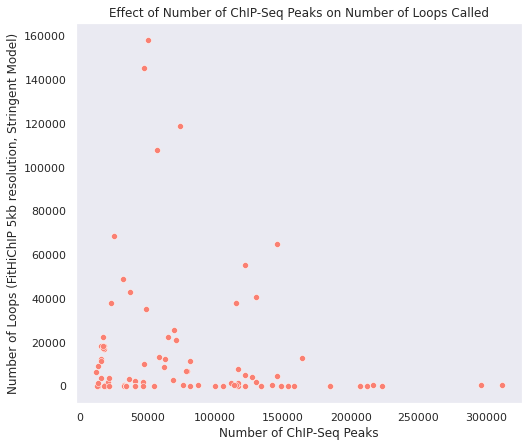

In [130]:
sns.set(rc = {'figure.figsize':(8,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.scatterplot(x="CP",y="FCP.S5", data=fcs_df_copy)
ax.set(ylabel='Number of Loops (FitHiChIP 5kb resolution, Stringent Model)', xlabel='Number of ChIP-Seq Peaks', title='Effect of Number of ChIP-Seq Peaks on Number of Loops Called')
fig = ax.get_figure()
fig.savefig('dist-loops-peaks.png', dpi=300) 

In [103]:
def read_hicpro_stats_log(log):
    log_data = 'check'
    with open(log) as fr:
        for line in fr:
            if line.strip().split()[0] == 'valid_interaction':
                info = line.strip().split()
                log_data = int(info[1])
    return(log_data)

In [111]:
mRSstat_data = []
tpl = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}_allValidPairs.mergestat'
glob_str = tpl.format(std_sample_name='*')
for fn in glob.glob(glob_str):
    data = []
    std_sample_name = fn.split('/')[2]
    data.append(std_sample_name)
    mRSstat = read_hicpro_stats_log(fn)
    data.append(mRSstat)
    mRSstat_data.append(data)
mRSstat_df = pd.DataFrame(mRSstat_data)
columns = ['sample_name', 'valid_pairs']
mRSstat_df.columns = columns

In [120]:
fcs_df_copy_1 = fcs_df_copy.copy(deep=True)
fcs_df_copy_1 = fcs_df_copy_1.merge(mRSstat_df)

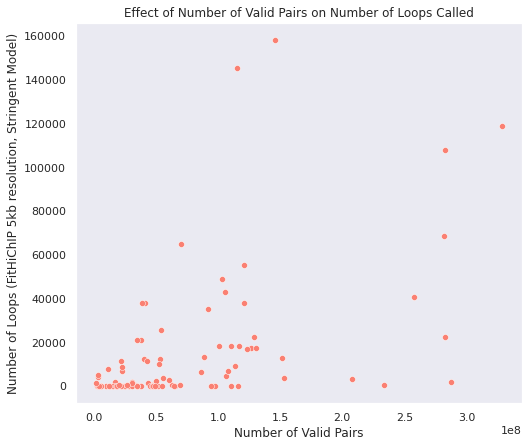

In [129]:
sns.set(rc = {'figure.figsize':(8,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.scatterplot(x="valid_pairs",y="FCP.S5", data=fcs_df_copy_1)
ax.set(ylabel='Number of Loops (FitHiChIP 5kb resolution, Stringent Model)', xlabel='Number of Valid Pairs', title='Effect of Number of Valid Pairs on Number of Loops Called')
fig = ax.get_figure()
fig.savefig('dist-loops-validpairs.png', dpi=300) 

In [145]:
def read_loop_files_dist(file):
    loops_dists = []
    with open(file) as fr:
        next(fr)
        for line in fr:
            info = line.strip().split()
            loops_dists.append(int(info[4]) - int(info[1]))
    return loops_dists

In [149]:
file = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/fithichip/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1_chipseq.peaks/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed'
dists = read_loop_files_dist(file)

In [152]:
dists_df = pd.DataFrame(dists)
dists_df.describe()

,0
count,1.278600e+04
mean,2.185891e+05
std,2.136933e+05
min,2.000000e+04
25%,8.500000e+04
50%,1.500000e+05
75%,2.800000e+05
max,1.990000e+06


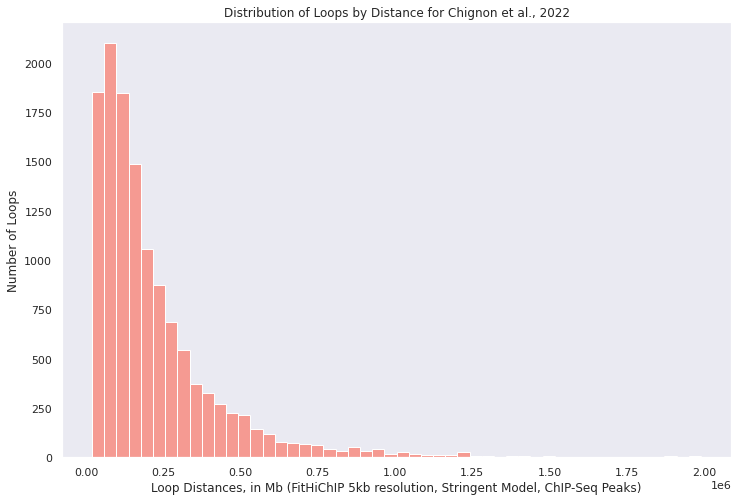

In [160]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.histplot(x=0, data=dists_df, bins=50)
ax.set(xlabel='Loop Distances, in Mb (FitHiChIP 5kb resolution, Stringent Model, ChIP-Seq Peaks)', ylabel='Number of Loops', title='Distribution of Loops by Distance for Chignon et al., 2022')
fig = ax.get_figure()
fig.savefig('dist-loops-dist-5kb.png', dpi=300) 

## T2T and hg38 Fold Change

In [91]:
fcs_df.loc[fcs_df["chm13 Number Peaks, ChIP-seq"] == "n/a" and fcs_df["hg38 Number Peaks, ChIP-seq"] != "n/a"]

KeyError: 'chm13 Number Peaks, ChIP-seq'

In [85]:
valid_fcs_df = fcs_df.loc[(fcs_df["chm13 Number Peaks, ChIP-seq"] != "n/a")]
cols = ["sample_name", "chm13_peaks", "chm13_s5", "chm13_l5", "chm13_s10", "chm13_l10", "chm13_s25", "chm13_l25", "hg38_peaks", "hg38_s5", "hg38_l5", "hg38_s10", "hg38_l10", "hg38_s25", "hg38_l25"]
valid_fcs_df.columns = cols
valid_fcs_df

,sample_name,chm13_peaks,chm13_s5,chm13_l5,chm13_s10,chm13_l10,chm13_s25,chm13_l25,hg38_peaks,hg38_s5,hg38_l5,hg38_s10,hg38_l10,hg38_s25,hg38_l25
0,Nonclassical_Monocyte_1800.phs001703v4p1.Homo_Sapiens.H3K27ac.b2,198329,2159,4820,3950,11631,8259,21917,169621,1865,4665,3512,11338,7868,22124
1,HeLa-S3-shBHLHE40.GSE137849.Homo_Sapiens.CTCF.b1,27629,981,931,3584,3652,12764,15935,32921,367,887,1652,3935,7911,17299
2,Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,260427,3206,4221,6095,9209,6864,12931,260797,3246,4149,6341,9274,6955,12846
4,Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,122299,2037,5201,3414,11726,4152,18173,122506,1973,5081,3497,11487,4055,17697
6,Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,260427,1245,1671,2797,4640,3536,8177,260797,1183,1642,2793,4729,3550,8112
11,Hela-S3-OE.GSE108869.Homo_Sapiens.CTCF.b2,148106,71,105,3578,5468,51385,66258,148577,81,103,3745,5398,52251,64161
12,Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,260427,6133,10965,8008,19916,12980,31618,260797,5882,10614,8096,19257,12917,30673
13,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,115054,175,412,2848,6413,30386,55050,115154,177,393,2800,6010,30157,51884
14,THP-1-del-cIDR.GSE149420.Homo_Sapiens.H3K27ac.b1,11772,51193,68455,34038,61716,24107,53542,13491,9149,46164,8843,47980,9085,46720
15,NF_1.GSE165303.Homo_Sapiens.H3K27ac.b1,132432,1095,2009,6728,14298,29411,57005,132375,1062,1911,6622,13775,29735,55843


In [101]:
def fold_change(chm13_value, hg38_value):
    if (hg38_value == 0 or chm13_value == 0):
        return "N/A"
    return math.log((chm13_value / hg38_value), 2)

In [102]:
valid_fcs_df['peaks_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_peaks, x.hg38_peaks), axis=1)
valid_fcs_df['s5_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_s5, x.hg38_s5), axis=1)
valid_fcs_df['l5_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_l5, x.hg38_l5), axis=1)
valid_fcs_df['s10_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_s10, x.hg38_s10), axis=1)
valid_fcs_df['l10_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_l10, x.hg38_l10), axis=1)
valid_fcs_df['s25_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_s25, x.hg38_s25), axis=1)
valid_fcs_df['l25_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_l25, x.hg38_l25), axis=1)

/tmp/ipykernel_84468/2591117844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_fcs_df['peaks_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_peaks, x.hg38_peaks), axis=1)
/tmp/ipykernel_84468/2591117844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_fcs_df['s5_fold_change'] = valid_fcs_df.apply(lambda x: fold_change(x.chm13_s5, x.hg38_s5), axis=1)
/tmp/ipykernel_84468/2591117844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [103]:
valid_fcs_df

,sample_name,chm13_peaks,chm13_s5,chm13_l5,chm13_s10,chm13_l10,chm13_s25,chm13_l25,hg38_peaks,hg38_s5,hg38_l5,hg38_s10,hg38_l10,hg38_s25,hg38_l25,Fold Change Peaks,peaks_fold_change,s5_fold_change,l5_fold_change,s10_fold_change,l10_fold_change,s25_fold_change,l25_fold_change
0,Nonclassical_Monocyte_1800.phs001703v4p1.Homo_Sapiens.H3K27ac.b2,198329,2159,4820,3950,11631,8259,21917,169621,1865,4665,3512,11338,7868,22124,0.225581,0.225581,0.211188,0.047156,0.16956,0.036809,0.06997,-0.013562
1,HeLa-S3-shBHLHE40.GSE137849.Homo_Sapiens.CTCF.b1,27629,981,931,3584,3652,12764,15935,32921,367,887,1652,3935,7911,17299,-0.252825,-0.252825,1.418473,0.069847,1.117357,-0.107677,0.690149,-0.11849
2,Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,260427,3206,4221,6095,9209,6864,12931,260797,3246,4149,6341,9274,6955,12846,-0.002048,-0.002048,-0.017889,0.024821,-0.057084,-0.010147,-0.019001,0.009515
4,Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,122299,2037,5201,3414,11726,4152,18173,122506,1973,5081,3497,11487,4055,17697,-0.002440,-0.002440,0.046055,0.033677,-0.034655,0.029709,0.034105,0.038292
6,Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,260427,1245,1671,2797,4640,3536,8177,260797,1183,1642,2793,4729,3550,8112,-0.002048,-0.002048,0.073696,0.025258,0.002065,-0.02741,-0.005701,0.011514
11,Hela-S3-OE.GSE108869.Homo_Sapiens.CTCF.b2,148106,71,105,3578,5468,51385,66258,148577,81,103,3745,5398,52251,64161,-0.004581,-0.004581,-0.190103,0.027745,-0.065812,0.018588,-0.024111,0.046398
12,Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,260427,6133,10965,8008,19916,12980,31618,260797,5882,10614,8096,19257,12917,30673,-0.002048,-0.002048,0.060286,0.046937,-0.015767,0.048545,0.007019,0.043777
13,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,115054,175,412,2848,6413,30386,55050,115154,177,393,2800,6010,30157,51884,-0.001253,-0.001253,-0.016394,0.068115,0.024522,0.093634,0.010914,0.085453
14,THP-1-del-cIDR.GSE149420.Homo_Sapiens.H3K27ac.b1,11772,51193,68455,34038,61716,24107,53542,13491,9149,46164,8843,47980,9085,46720,-0.196638,-0.196638,2.484261,0.568388,1.944538,0.363211,1.407894,0.196631
15,NF_1.GSE165303.Homo_Sapiens.H3K27ac.b1,132432,1095,2009,6728,14298,29411,57005,132375,1062,1911,6622,13775,29735,55843,0.000621,0.000621,0.044147,0.07215,0.022911,0.053761,-0.015806,0.029712


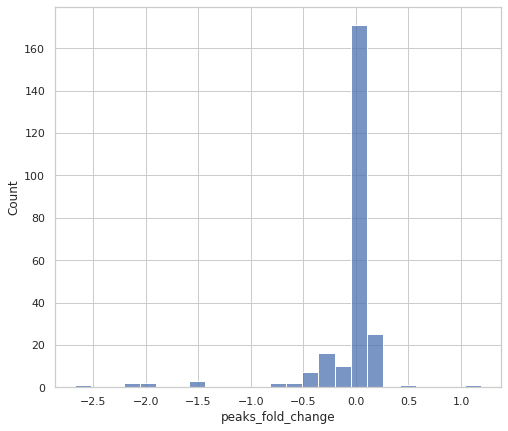

In [115]:
ax = sns.histplot(x="peaks_fold_change", data=valid_fcs_df, bins=25)
#ax.set(ylabel='Number of Loops (FitHiChIP 5kb resolution, Stringent Model)', xlabel='Number of ChIP-Seq Peaks', title='Effect of Number of ChIP-Seq Peaks on Number of Loops Called')

ValueError: Unable to parse string "N/A" at position 21

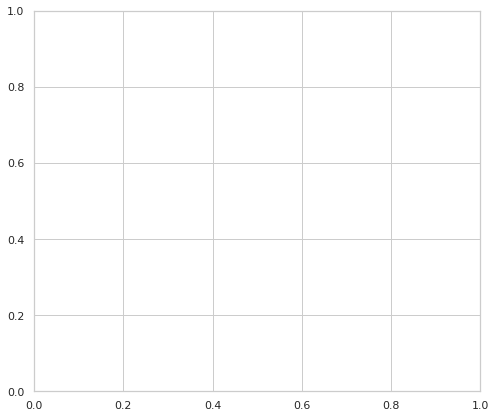

In [117]:
valid_fcs_df.loc[]
ax = sns.histplot(x="s10_fold_change", data=valid_fcs_df, bins=25)

## Biorep_Merged Figures

In [12]:
hg38_brm_df = pd.read_excel("tables/human_biorep_merged_loops_5_25_23.xlsx", skiprows=0)
t2t_brm_df = pd.read_excel("tables/human_t2t_biorep_merged_loops_5_25_23.xlsx", skiprows=0)
mm10_brm_df = pd.read_excel("tables/mouse_biorep_merged_loops_5_25_23.xlsx", skiprows=0)

columns = ["hi", "sample_name", "f_peaks", "f_S5", "f_L5", "f_S10", "f_L10", "f_S25", "f_L25", "cs_peaks", "cs_S5", "cs_L5", "cs_S10", "cs_L10", "cs_S25", "cs_L25"]
columns_t2t = ["hi", "sample_name", "f_peaks", "f_S5", "f_L5", "f_S10", "f_L10", "f_S25", "f_L25", "cs_peaks", "cs_S5", "cs_L5", "cs_S10", "cs_L10", "cs_S25", "cs_L25"]

hg38_brm_df.columns = columns
hg38_brm_df = hg38_brm_df.drop(columns=["hi"])

t2t_brm_df.columns = columns_t2t

mm10_brm_df.columns = columns
mm10_brm_df = mm10_brm_df.drop(columns=["hi"])

hg38_brm_df = hg38_brm_df.fillna(-1)
t2t_brm_df = t2t_brm_df.fillna(-1)
mm10_brm_df = mm10_brm_df.fillna(-1)

In [13]:
def sequencing_depth(sample):
    samplesheet = "results/samplesheets/post-hicpro/human_biorep_merged.peaks_files.samplesheet.without_header.tsv"
    with open(samplesheet) as s:
        for line in s:
            if line.strip().split("\t")[0] == sample:
                vp = line.strip().split("\t")[1]
                with open(vp) as v:
                    count = 0
                    for line in v:
                        count = count + 1
                return count
            
#hg38_brm_df["sequencing_depth"] = hg38_brm_df.apply(lambda x : int(sequencing_depth(x["sample_name"])), axis = 1)

Text(0.5, 1.0, 'hg38 FitHiChIP, FitHiChIP Peaks')

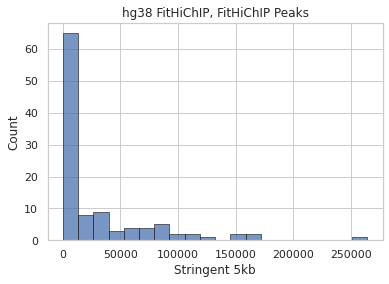

In [14]:
ax = sns.histplot(hg38_brm_df["f_S5"], bins=20, edgecolor="k", linewidth=0.6)
ax.set_xlabel("Stringent 5kb")
ax.set_title("hg38 FitHiChIP, FitHiChIP Peaks")

In [15]:
df = pd.read_excel("tables/biorep_merged_loops_hg38.xlsx", skiprows=0)
df = df.drop(columns = ["Unnamed: 0"])

In [130]:
df

,sample_name,f_peaks,f_S5,f_L5,f_S10,f_L10,f_S25,f_L25,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,sequencing_depth
0,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.biorep_merged,18697,339,2138,3314,14484,21934,57548,115154,1116,2708,9701,21161,60471,100686,79188734
1,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.biorep_merged,24562,82,335,1979,6836,26375,56964,102935,162,362,3980,9052,53055,91370,82104260
2,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.biorep_merged,39703,14,20,644,1195,21864,37185,104318,17,24,759,1540,31143,52092,76037647
3,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.biorep_merged,82095,23844,83820,52086,152729,100492,207777,-1,0,0,0,0,0,0,88848483
4,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.biorep_merged,53269,27818,69708,117653,240631,276769,438981,-1,0,0,0,0,0,0,290734079
5,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.biorep_merged,44481,5587,15497,29103,67341,94656,168939,-1,0,0,0,0,0,0,132056146
6,A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.biorep_merged,63686,2546,5772,39088,72309,152458,239253,-1,0,0,0,0,0,0,210004931
7,A673_WT.GSE133227.Homo_Sapiens.CTCF.biorep_merged,73585,37673,115740,118947,279590,245405,417788,-1,0,0,0,0,0,0,259701598
8,A673_WT.GSE133227.Homo_Sapiens.H3K27ac.biorep_merged,125276,2979,7197,42797,83575,174875,276516,-1,0,0,0,0,0,0,193924357
9,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.biorep_merged,58779,36873,341607,65419,417625,87443,375262,-1,0,0,0,0,0,0,190932989


In [134]:
inferred = df.loc[df["cs_S5"] > 0].drop(columns = ["f_peaks", "f_S5", "f_L5", "f_S10", "f_L10", "f_S25", "f_L25"]).sort_values(by="sample_name", ascending = True).reset_index(drop=True)
inferred = inferred.loc[inferred.sample_name.str.contains("CTCF")]

In [135]:
inferred.describe()

,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,sequencing_depth
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,123357.600000,1717.600000,2920.200000,15893.000000,27778.100000,95621.200000,136176.400000,9.213211e+07
std,19457.189412,1458.094053,2337.388086,17034.280796,31482.248061,79614.642681,100243.642524,4.033181e+07
min,102935.000000,17.000000,24.000000,759.000000,1540.000000,31143.000000,52092.000000,5.989839e+07
25%,113006.000000,400.500000,948.500000,7250.750000,14524.250000,54909.000000,89132.000000,6.692577e+07
50%,117300.500000,1812.000000,2963.500000,10737.000000,19229.000000,62064.500000,96286.500000,7.761319e+07
75%,129791.500000,2445.000000,3419.250000,15835.250000,24447.500000,96660.750000,149201.250000,9.511043e+07
max,163415.000000,4735.000000,6990.000000,59810.000000,113146.000000,294027.000000,396527.000000,1.853043e+08


In [136]:
print(inferred["cs_S5"].quantile(0))
print(inferred["cs_S5"].quantile(0.1))
print(inferred["cs_S5"].quantile(0.2))
print(inferred["cs_S5"].quantile(0.3))
print(inferred["cs_S5"].quantile(0.4))
print(inferred["cs_S5"].quantile(0.5))
print(inferred["cs_S5"].quantile(0.56), "T")
print(inferred["cs_S5"].quantile(0.57), "T")
print(inferred["cs_S5"].quantile(0.6))
print(inferred["cs_S5"].quantile(0.62))
print(inferred["cs_S5"].quantile(0.65))
print(inferred["cs_S5"].quantile(0.7))
print(inferred["cs_S5"].quantile(0.8))
print(inferred["cs_S5"].quantile(0.85))
print(inferred["cs_S5"].quantile(0.89))
print(inferred["cs_S5"].quantile(0.98))
print(inferred["cs_S5"].quantile(1.0))

17.0
115.10000000000001
154.8
829.7999999999997
1459.8
1812.0
1946.5200000000002 T
1972.44 T
2050.2
2102.04
2179.8
2311.8
2546.0
2606.75
2674.8099999999995
4360.420000000001
4735.0


In [138]:
inferred.loc[inferred["cs_S5"] > 1000]

,sample_name,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,sequencing_depth
0,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.biorep_merged,115154,1116,2708,9701,21161,60471,100686,79188734
15,HeLa-S3-shBHLHE40.GSE137849.Homo_Sapiens.CTCF.biorep_merged,163415,2654,3431,13076,18026,62994,88386,64205715
16,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF.biorep_merged,118265,4735,6990,16755,25543,69942,99863,66488553
17,Hela-S3-OE.GSE108869.Homo_Sapiens.CTCF.biorep_merged,148577,2223,3166,26941,37498,168562,192023,140410272
27,NSD2-High-NTKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged,112290,1689,2761,10983,18558,61135,92710,68237428
28,NSD2-Low-TKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged,118846,1935,3384,10491,19900,49316,82734,59898392
48,OCI-AML3-WT.GSE111537.Homo_Sapiens.CTCF.biorep_merged,116336,2519,6097,59810,113146,294027,396527,185304295


In [142]:
p = inferred.loc[inferred["cs_S5"] > 1000][["sample_name"]]
p["org"] = "Homo_Sapiens"

In [143]:
p

,sample_name,org
0,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.biorep_merged,Homo_Sapiens
15,HeLa-S3-shBHLHE40.GSE137849.Homo_Sapiens.CTCF.biorep_merged,Homo_Sapiens
16,HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF.biorep_merged,Homo_Sapiens
17,Hela-S3-OE.GSE108869.Homo_Sapiens.CTCF.biorep_merged,Homo_Sapiens
27,NSD2-High-NTKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged,Homo_Sapiens
28,NSD2-Low-TKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged,Homo_Sapiens
48,OCI-AML3-WT.GSE111537.Homo_Sapiens.CTCF.biorep_merged,Homo_Sapiens


Text(0.5, 1.0, 'hg38 FitHiChIP 30 B+ Samples, HiChIP-Inferred Peaks')

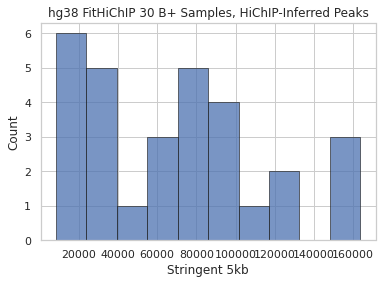

In [55]:
subset = inferred.loc[inferred["f_S5"] > 8000]
subset = subset.loc[subset["f_S5"] < 170000]
ax = sns.histplot(subset["f_S5"], bins=10,edgecolor="k", linewidth=0.6)
ax.set_xlabel("Stringent 5kb")
ax.set_title("hg38 FitHiChIP 30 B+ Samples, HiChIP-Inferred Peaks")

In [56]:
subset.describe()

,f_peaks,f_S5,f_L5,f_S10,f_L10,f_S25,f_L25,sequencing_depth
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,113129.166667,69391.233333,333274.466667,109472.866667,406982.466667,136954.800000,383834.833333,1.524868e+08
std,50172.090480,44680.965807,204785.713850,54377.896014,186074.998293,58351.858905,111607.370994,5.973221e+07
min,39154.000000,8453.000000,25745.000000,24131.000000,101318.000000,47982.000000,171789.000000,6.217461e+07
25%,66512.500000,32196.250000,134535.000000,67830.750000,275846.250000,101915.500000,308518.000000,1.005772e+08
50%,112993.000000,68996.000000,326540.500000,111720.000000,384547.500000,123340.000000,400410.000000,1.597405e+08
75%,143633.250000,95116.750000,461907.500000,152047.250000,522715.000000,178408.750000,467228.500000,1.906898e+08
max,210983.000000,163582.000000,740037.000000,211501.000000,705635.000000,292832.000000,594786.000000,2.828359e+08


In [28]:
sam.describe()

,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,sequencing_depth
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,176640.200000,42765.366667,87822.333333,47561.300000,104802.500000,47572.066667,104975.400000,3.470772e+07
std,64731.450426,18270.686289,44795.279532,16874.304167,44940.408844,14112.983193,37965.163709,1.398948e+07
min,115990.000000,13292.000000,21368.000000,17797.000000,34383.000000,24405.000000,43985.000000,1.762623e+07
25%,122506.000000,32145.250000,54944.500000,37832.750000,77040.000000,39376.000000,78929.750000,2.576595e+07
50%,136763.000000,40275.500000,80473.500000,45424.000000,97403.000000,44821.500000,95188.500000,2.984749e+07
75%,247145.000000,53546.250000,111266.500000,57317.250000,121174.500000,55633.500000,118728.750000,4.076923e+07
max,260797.000000,80669.000000,200429.000000,79711.000000,227208.000000,73710.000000,214055.000000,7.504072e+07


In [58]:
subset.sort_values(by="f_S5", ascending = True).reset_index(drop=True)

,sample_name,f_peaks,f_S5,f_L5,f_S10,f_L10,f_S25,f_L25,sequencing_depth
0,Parietal-Lobe.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged,90496,8453,27809,34231,101318,101614,235586,111317883
1,Primary-T-D0.GSE168881.Homo_Sapiens.H3K27ac.biorep_merged,54460,13923,88798,28893,135583,55423,171789,89597475
2,SNU16-dCas9-KRAB.GSE159985.Homo_Sapiens.H3K27ac.biorep_merged,39154,16113,109287,24131,180535,47982,234646,160469108
3,Retina.GSE196235.Homo_Sapiens.H3K27ac.biorep_merged,162337,16247,25745,95863,149007,292832,419171,282835944
4,Primary-Foreskin-Keratinocytes-Day3.GSE158642.Homo_Sapiens.H3K27ac.biorep_merged,42359,17809,119403,30382,170689,53162,209878,116388926
5,Primary-Foreskin-Keratinocytes-Day6.GSE158642.Homo_Sapiens.H3K27ac.biorep_merged,45064,19055,125637,32805,178743,51526,206592,105214758
6,Primary-Foreskin-Keratinocytes-Day0.GSE158642.Homo_Sapiens.H3K27ac.biorep_merged,55487,28744,227179,46028,282441,66586,279206,119864059
7,Middle-Frontal-Gyrus.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged,126142,31278,132137,64450,240244,107169,307064,78346920
8,Hippocampus.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged,142434,34951,112201,97874,273648,189389,419240,171463394
9,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.biorep_merged,58779,36873,341607,65419,417625,87443,375262,190932989


Text(0.5, 1.0, 'hg38 FitHiChIP 30 A+ Samples, ChIP-seq Peaks')

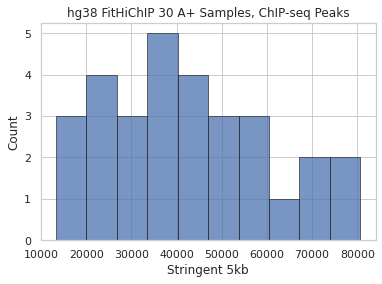

In [364]:
ax = sns.histplot(sam["cs_S5"], bins=10, edgecolor="k", linewidth=0.6)
ax.set_xlabel("Stringent 5kb")
ax.set_title("hg38 FitHiChIP 30 A+ Samples, ChIP-seq Peaks")

Text(0.5, 1.0, 'hg38 FitHiChIP, FitHiChIP Peaks')

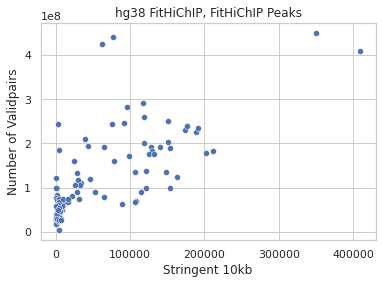

In [305]:
ax = sns.scatterplot(x=df["f_S10"].loc[df["f_S10"] > 0], y=df["sequencing_depth"])
ax.set_xlabel("Stringent 10kb")
ax.set_ylabel("Number of Validpairs")
ax.set_title("hg38 FitHiChIP, FitHiChIP Peaks")

In [23]:
sam = df.loc[df.sample_name.str.contains("phs001703v3")].drop(columns = ["f_peaks", "f_S5", "f_L5", "f_S10", "f_L10", "f_S25", "f_L25"]).sort_values(by="sample_name", ascending = True).reset_index(drop=True)

In [24]:
sam.describe()

,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,sequencing_depth
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,176640.200000,42765.366667,87822.333333,47561.300000,104802.500000,47572.066667,104975.400000,3.470772e+07
std,64731.450426,18270.686289,44795.279532,16874.304167,44940.408844,14112.983193,37965.163709,1.398948e+07
min,115990.000000,13292.000000,21368.000000,17797.000000,34383.000000,24405.000000,43985.000000,1.762623e+07
25%,122506.000000,32145.250000,54944.500000,37832.750000,77040.000000,39376.000000,78929.750000,2.576595e+07
50%,136763.000000,40275.500000,80473.500000,45424.000000,97403.000000,44821.500000,95188.500000,2.984749e+07
75%,247145.000000,53546.250000,111266.500000,57317.250000,121174.500000,55633.500000,118728.750000,4.076923e+07
max,260797.000000,80669.000000,200429.000000,79711.000000,227208.000000,73710.000000,214055.000000,7.504072e+07


In [405]:
sam

,sample_name,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,sequencing_depth
0,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,136763,46444,91528,50435,106047,46759,100632,28843945
1,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,136763,42074,82145,45893,95651,42586,90777,23900292
2,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,136763,72921,152379,76703,167941,70108,154316,49832122
3,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,136763,54039,115724,55371,125561,49666,112306,31342342
4,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,136763,72262,153029,75818,171230,71501,160444,55040077
5,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,136763,75489,166777,77381,181534,73710,167594,60053291
6,CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,115990,40010,95860,43819,108015,42654,100647,30637987
7,CD8_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,115990,17698,35409,22696,49432,25912,56968,19117823
8,CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,115990,33183,85296,39301,101858,40120,99597,28965603
9,CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,115990,38165,92743,41421,103507,40617,96348,29056995


In [86]:
def replace(name):
    if "Naive_K" in name:
        return name.replace("Naive_K", "Natural_Killer")
    else:
        return name

In [87]:
sam["sample_name_new"] = sam.apply(lambda x : replace(x["sample_name"]), axis = 1)

In [88]:
sam = sam[["sample_name_new"]]

In [89]:
sam.columns = ["sample_name"]

In [90]:
sam

,sample_name
0,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
1,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
2,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
3,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
4,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
5,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
6,CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
7,CD8_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
8,CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged
9,CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged


In [82]:
sam = sam.sort_values(by="sample_name", ascending = True).reset_index(drop=True)[["sample_name"]]

In [91]:
sam["peaks"] = sam.apply(lambda x : get_peaks_path(x["sample_name"], "chipseq", "hg38"), axis = 1)

/tmp/ipykernel_31697/2689623734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sam["peaks"] = sam.apply(lambda x : get_peaks_path(x["sample_name"], "chipseq", "hg38"), axis = 1)


In [92]:
sam["loops"] = sam.apply(lambda x : "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/" + get_loop_path_hg38("fithichip", "chipseq", x["sample_name"], "S5"), axis = 1)

/tmp/ipykernel_31697/3554835383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sam["loops"] = sam.apply(lambda x : "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/" + get_loop_path_hg38("fithichip", "chipseq", x["sample_name"], "S5"), axis = 1)


In [93]:
sam

,sample_name,peaks,loops
0,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/loops/fithichip/CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed
1,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/loops/fithichip/CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed
2,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/loops/fithichip/CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed
3,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/loops/fithichip/CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed
4,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/loops/fithichip/CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed
5,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/chipline/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1/MACS2_Ext_No_Control/CD4_Naive_merged_donors_hg38.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.macs2_peaks.narrowPeak_Q0.01filt,/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/loops/fithichip/CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed
6,CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merge

In [94]:
sam.to_csv("a_plus_samples.tsv", sep = "\t", header = False, index = None)

In [102]:
out = subset.sort_values(by="sample_name").reset_index(drop=True)[["sample_name"]]

In [105]:
out["org"] = out.apply(lambda x : "Homo_Sapiens", axis = 1)

In [144]:
p.to_csv("results/samplesheets/post-hicpro/ctcf_chipseq.tsv", sep = "\t", header = False, index = None)

In [116]:
samples = [s + "_fithichip.peaks" for s in out["sample_name"].to_list()] + [s + "_chipseq.peaks" for s in sam["sample_name"].to_list()]

In [120]:
samples = [s + "_chipseq.peaks" for s in sam["sample_name"].to_list()]

In [121]:
(" ").join(samples)

'CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD8_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD8_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged_chipseq.peaks Mon

## Figures

#### read in tables

In [30]:
hg38_df = pd.read_excel("tables/human_loops_3_27_23.xlsx", sheet_name="hg38", skiprows=2)
t2t_df = pd.read_excel("tables/human_loops_3_27_23.xlsx", sheet_name="chm13-t2t", skiprows=2)
mm10_df = pd.read_excel("tables/mouse_loops_3_27_23.xlsx", sheet_name="mm10", skiprows=2)

columns = ["hi", "sample_name", "hiccups_5kb", "hiccups_10kb", "hiccups_25kb", "cs_peaks", "cs_S5", "cs_L5", "cs_S10", "cs_L10", "cs_S25", "cs_L25", "hp_peaks", "hp_S5", "hp_L5", "hp_S10", "hp_L10", "hp_S25", "hp_L25", "f_peaks", "f_S5", "f_L5", "f_S10", "f_L10", "f_S25", "f_L25"]
columns_t2t = ["hi", "sample_name", "hiccups_5kb", "hiccups_10kb", "hiccups_25kb", "cs_peaks", "cs_S5", "cs_L5", "cs_S10", "cs_L10", "cs_S25", "cs_L25", "f_peaks", "f_S5", "f_L5", "f_S10", "f_L10", "f_S25", "f_L25"]

hg38_df.columns = columns
hg38_df = hg38_df.drop(columns=["hi", "hp_peaks", "hp_S5", "hp_L5", "hp_S10", "hp_L10", "hp_S25", "hp_L25"])

t2t_df.columns = columns_t2t

mm10_df.columns = columns
mm10_df = mm10_df.drop(columns=["hi", "hp_peaks", "hp_S5", "hp_L5", "hp_S10", "hp_L10", "hp_S25", "hp_L25"])

In [31]:
hg38_df = hg38_df.fillna(-1)
hg38_df_cp = hg38_df.copy()

t2t_df = t2t_df.fillna(-1)
t2t_df_cp = t2t_df.copy()

mm10_df = mm10_df.fillna(-1)
mm10_df_cp = mm10_df.copy()

In [32]:
hg38_df_cp

,sample_name,hiccups_5kb,hiccups_10kb,hiccups_25kb,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,f_peaks,f_S5,f_L5,f_S10,f_L10,f_S25,f_L25
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,-1.0,-1.0,-1.0,90971.0,0.0,0.0,0.0,0.0,0.0,0.0,29430,0,0,0,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,-1.0,-1.0,-1.0,93587.0,0.0,0.0,0.0,0.0,3.0,5.0,73184,0,0,0,0,3,5
2,293T.GSE128106.Homo_Sapiens.YY1.b1,-1.0,-1.0,-1.0,119725.0,0.0,0.0,0.0,0.0,0.0,0.0,987,0,0,0,0,0,0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1.0,-1.0,-1.0,115154.0,177.0,393.0,2800.0,6010.0,30157.0,51884.0,11489,47,346,776,3989,8323,24510
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1.0,-1.0,-1.0,115154.0,35.0,65.0,570.0,1284.0,9008.0,16829.0,10428,7,58,148,990,2518,9413
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1.0,-1.0,-1.0,102935.0,11.0,23.0,734.0,1745.0,22242.0,39397.0,7761,4,29,186,1111,4839,15127
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1.0,-1.0,-1.0,102935.0,3.0,7.0,123.0,295.0,7040.0,13616.0,23228,3,6,71,260,3720,9577
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1.0,-1.0,-1.0,104318.0,3.0,3.0,56.0,93.0,8455.0,14863.0,9018,3,4,39,94,2688,5674
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1.0,-1.0,-1.0,104318.0,4.0,4.0,10.0,17.0,3662.0,6444.0,27484,5,5,16,23,2398,4350
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,60295,3514,11200,11313,34768,33321,79208


#### group df, both hiccups and fithichip

In [33]:
def get_formatted_df(loop_type, df):
    
    if loop_type == "fithichip_chipseq":
        columns = ["sample_name", "cs_S5", "cs_L5", "cs_S10", "cs_L10", "cs_S25", "cs_L25"]
    elif loop_type == "fithichip_fithichip":
        columns = ["sample_name", "f_S5", "f_L5", "f_S10", "f_L10", "f_S25", "f_L25"]
    
    if loop_type == "hiccups":
        hiccups_5kb = df[["sample_name", "hiccups_5kb"]]
        hiccups_5kb = hiccups_5kb.assign(res=5000)
        hiccups_5kb.columns = ["sample_name", "num_loops", "res"]

        hiccups_10kb = df[["sample_name", "hiccups_10kb"]]
        hiccups_10kb = hiccups_10kb.assign(res=10000)
        hiccups_10kb.columns = ["sample_name", "num_loops", "res"]

        hiccups_25kb = df[["sample_name", "hiccups_25kb"]]
        hiccups_25kb = hiccups_25kb.assign(res=25000)
        hiccups_25kb.columns = ["sample_name", "num_loops", "res"]

        hiccups_combo = pd.concat([hiccups_5kb, hiccups_10kb, hiccups_25kb])
        hiccups_combo = hiccups_combo.sort_values(by=["sample_name", "res"])

        grps = hiccups_combo.groupby(['res']) 
  
    else:
        S_5kb = df[["sample_name", columns[1]]]
        S_5kb = S_5kb.assign(res=5000)
        S_5kb = S_5kb.assign(bkgd="S")
        S_5kb.columns = ["sample_name", "num_loops", "res", "bkgd"]
        
        L_5kb = df[["sample_name", columns[2]]]
        L_5kb = L_5kb.assign(res=5000)
        L_5kb = L_5kb.assign(bkgd="L")
        L_5kb.columns = ["sample_name", "num_loops", "res", "bkgd"]
        
        S_10kb = df[["sample_name", columns[3]]]
        S_10kb = S_10kb.assign(res=10000)
        S_10kb = S_10kb.assign(bkgd="S")
        S_10kb.columns = ["sample_name", "num_loops", "res", "bkgd"]
        
        L_10kb = df[["sample_name", columns[4]]]
        L_10kb = L_10kb.assign(res=10000)
        L_10kb = L_10kb.assign(bkgd="L")
        L_10kb.columns = ["sample_name", "num_loops", "res", "bkgd"]
        
        S_25kb = df[["sample_name", columns[5]]]
        S_25kb = S_25kb.assign(res=25000)
        S_25kb = S_25kb.assign(bkgd="S")
        S_25kb.columns = ["sample_name", "num_loops", "res", "bkgd"]
        
        L_25kb = df[["sample_name", columns[6]]]
        L_25kb = L_25kb.assign(res=25000)
        L_25kb = L_25kb.assign(bkgd="L")
        L_25kb.columns = ["sample_name", "num_loops", "res", "bkgd"]

        fithichip_combo = pd.concat([S_5kb, L_5kb, S_10kb, L_10kb, S_25kb, L_25kb])
        fithichip_combo = fithichip_combo.sort_values(by=["sample_name", "res", "bkgd"])

        grps = fithichip_combo.groupby(['res', 'bkgd']) 
    
    return grps

#### color palette

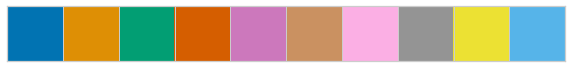

In [23]:
sns.palplot(sns.color_palette('colorblind'))

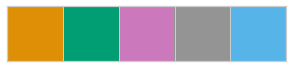

In [24]:
from operator import itemgetter
palette = itemgetter(1, 2, 4, 7, 9)(sns.color_palette('colorblind'))
sns.palplot(palette)

#### hiccups

In [25]:
def get_upper_limit(grps):
    resolutions = [5000, 10000, 25000]
    limits = []
    for i, res in enumerate(resolutions):
        tdf = grps.get_group((res))
        tnums = tdf.num_loops
        upper_lim = tnums.quantile(0.75) + (1.5 * (tnums.quantile(0.75) - tnums.quantile(0.25)))
        limits.append(upper_lim)
    return max(limits)

In [26]:
def getPlot(loop_type):
    
    sns.set_style("white")
    
    if loop_type == "hiccups":
        loops = get_formatted_df("hiccups", hg38_df_cp)
    elif loop_type == "fithichip_chipseq":
        loops = get_formatted_df("fithichip_chipseq", hg38_df_cp)
    elif loop_type == "fithichip_fithichip":
        loops = get_formatted_df("fithichip_fithichip", hg38_df_cp)
        
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(8, 7), layout="constrained")
    axes = axes.tolist()
    
    transform = "raw"
    num_bins = 25

    resolutions = [5000, 10000, 25000]
    upper_limit = get_upper_limit(loops)
    for i, res in enumerate(resolutions):
        ax = axes[i]
        #color = palette[i]
        color = palette[-1]
        tdf = loops.get_group((res))
        tnums = tdf.num_loops
        tnums = tnums[(tnums > 0) & (tnums < 150000)]

        if transform == 'raw':
            sns.histplot(tnums, ax=ax, color=color, bins=num_bins, binrange=(0, upper_limit), edgecolor="k", linewidth=0.6)
            title = 'Number of Loops at {}kb'.format(int(res / 1000))
        elif transform == 'log':
            sns.histplot(np.log(tnums), ax=ax, color=color)
            title = 'Number of Loops at {}kb ($log_{{10}}$)'.format(int(res / 1000))

        ax.set_xlabel(title)
        ax.text(0.78,0.8,'n = {} samples'.format(len(tnums)), transform=ax.transAxes)

        if i == 3:
            break
        fig.suptitle('hg38 HiCCUPS', size=16)

    fn = 'figures/manuscript/hg38.loops.hiccups.png'
    #fig.savefig(fn, dpi=1000)

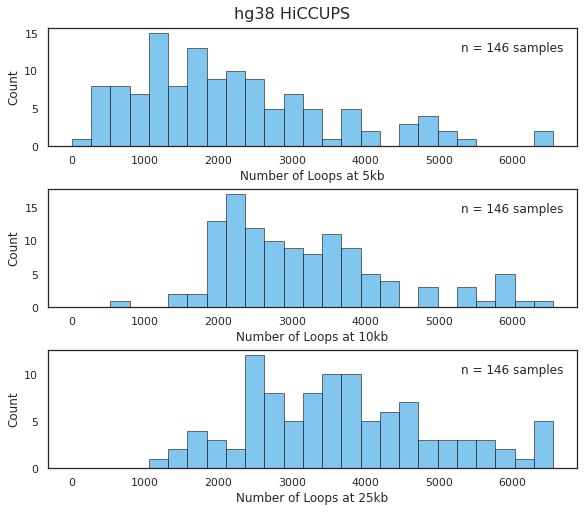

In [48]:
getPlot("hiccups")

#### fithichip

In [61]:
def get_upper_limit(grps):
    resolutions = [5000, 10000, 25000]
    backgrounds = ["S", "L"]
    limits_5 = []
    limits_10 = []
    limits_25 = []
    for i, bkgd in enumerate(backgrounds):
        for j, res in enumerate(resolutions):
            tdf = grps.get_group((res, bkgd))
            tnums = tdf.num_loops
            #upper_lim = tnums.quantile(0.75) + (1.5 * (tnums.quantile(0.75) - tnums.quantile(0.25)))
            upper_lim = tnums.quantile(0.75)
            if res == 5000:
                limits_5.append(upper_lim)
            elif res == 10000:
                limits_10.append(upper_lim)
            elif res == 25000:
                limits_25.append(upper_lim)
    return round(int(max(limits_5)), -3), round(int(max(limits_10)), -3), round(int(max(limits_25)), -3)

In [64]:
def getPlot(loop_type):
    
    sns.set_style("white")
    
    if loop_type == "hiccups":
        loops = get_formatted_df("hiccups", hg38_df_cp)
    elif loop_type == "fithichip_chipseq":
        loops = get_formatted_df("fithichip_chipseq", hg38_df_cp)
    elif loop_type == "fithichip_fithichip":
        loops = get_formatted_df("fithichip_fithichip", hg38_df_cp)
        
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(25, 7), layout="constrained")
    axes = axes.tolist()
    
    transform = "raw"
    num_bins = 25

    resolutions = [5000, 10000, 25000]
    backgrounds = ["S", "L"]
    upper_limits = get_upper_limit(loops)
    print(upper_limits)
    #upper_limit = 80000
    for i, bkgd in enumerate(backgrounds):
        for j, res in enumerate(resolutions):
            print(i,j)
            ax = axes[i][j]
            #color = palette[i]
            color = palette[0]
            tdf = loops.get_group((res, bkgd))
            tnums = tdf.num_loops
            tnums = tnums[(tnums > 0)]
            
            if res == 5000:
                upper_limit = upper_limits[0]
            elif res == 10000:
                upper_limit = upper_limits[1]
            elif res == 25000:
                upper_limit = upper_limits[2]
                
            print(upper_limit)

            if transform == 'raw':
                sns.histplot(tnums, ax=ax, color=color, bins=num_bins, binrange=(0, upper_limit))
                #sns.violinplot(tnums, ax=ax, color=color)
                title = 'Number of Loops at {r}kb, {s} Background'.format(r = int(res / 1000), s = bkgd)
            elif transform == 'log':
                sns.histplot(np.log(tnums), ax=ax, color=color)
                title = 'Number of Loops at {}kb ($log_{{10}}$)'.format(int(res / 1000))

            ax.set_xlabel(title)
            ax.text(0.79,0.87,'n = {} samples'.format(len(tnums)), transform=ax.transAxes)

            if j == 2:
                break
            fig.suptitle('hg38 FitHiChIP with HiChIP-Inferred Peaks', size=16)
        if i == 3:
            break

    fn = 'figures/manuscript/hg38.loops.fithichip-fithichip.png'
    #fig.savefig(fn, dpi=1000)

(32000, 61000, 100000)
0 0
32000
0 1
61000
0 2
100000
1 0
32000
1 1
61000
1 2
100000


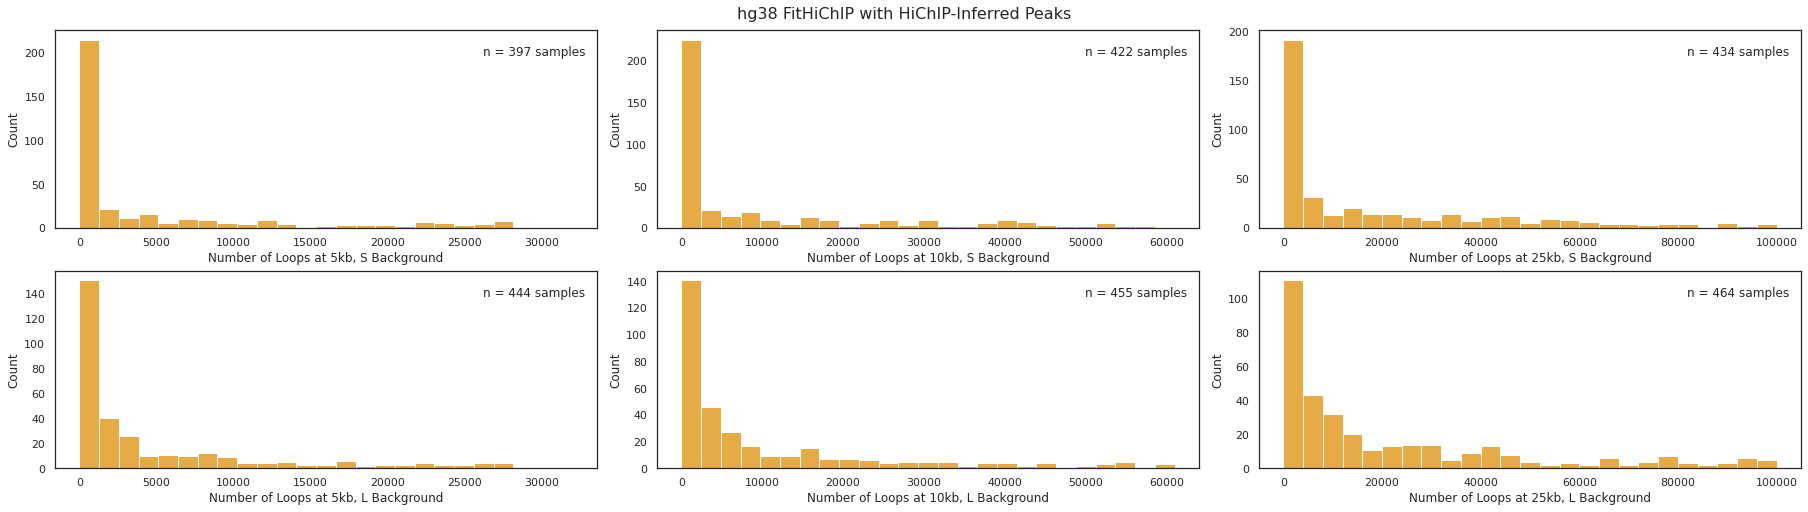

In [65]:
getPlot("fithichip_fithichip")

(79000, 152000, 246000)
0 0
79000
0 1
152000
0 2
246000
1 0
79000
1 1
152000
1 2
246000


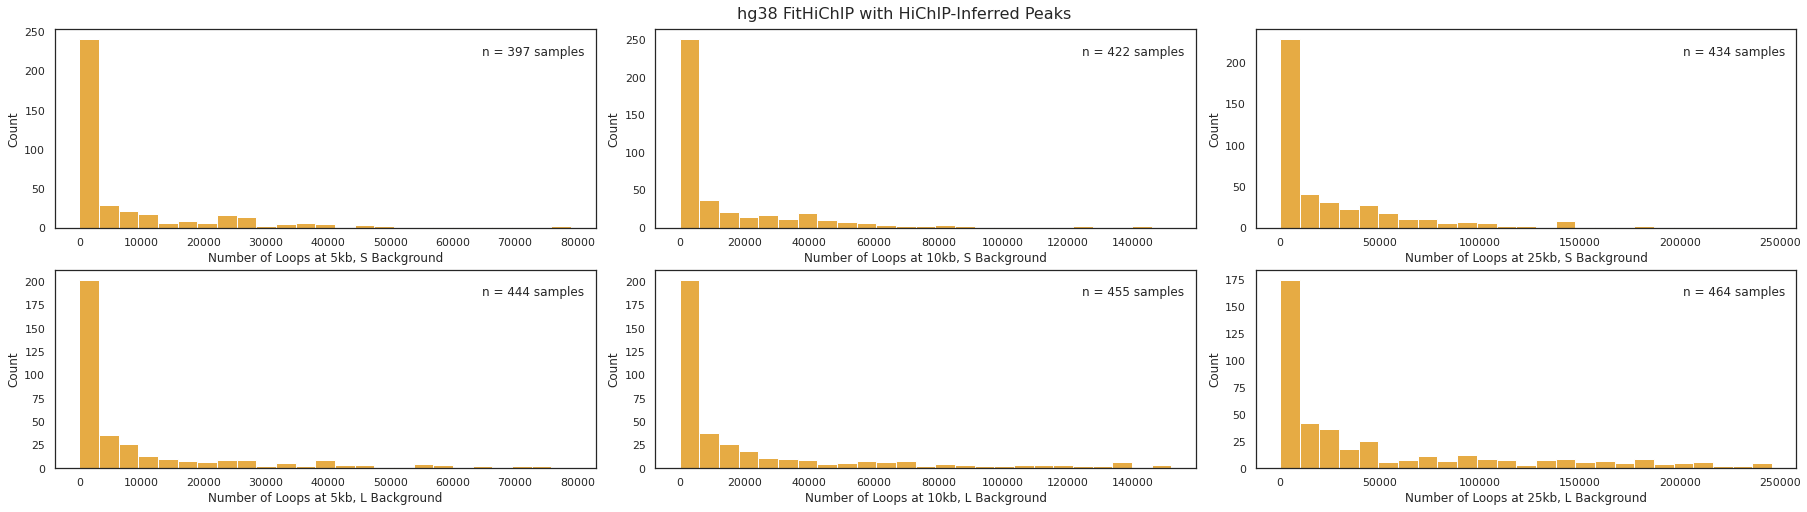

In [83]:
getPlot("fithichip_fithichip")

In [130]:
hg38_df_cp.describe()

,hiccups_5kb,hiccups_10kb,hiccups_25kb,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,f_peaks,f_S5,f_L5,f_S10,f_L10,f_S25,f_L25
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,1001.088477,1405.364198,2103.786008,71867.823045,5130.732510,14296.765432,7597.259259,20486.209877,13024.189300,28686.176955,31375.265432,8415.510288,39900.679012,15092.257202,56659.006173,27189.417695,71164.176955
std,2506.691222,3039.225340,5963.783686,83832.999774,15215.449454,42393.877742,22325.891327,53133.539051,34148.244761,59142.619156,42223.338448,20607.635748,85348.780832,33221.280140,105874.775778,53948.440569,107780.935955
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2684.500000,10.250000,118.500000,71.000000,834.250000,498.250000,3167.000000
50%,-1.000000,-1.000000,-1.000000,18.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,12752.500000,291.500000,3030.000000,1243.000000,7126.500000,3935.500000,20859.000000
75%,1053.000000,2202.000000,2621.750000,125879.000000,3012.000000,6728.750000,6658.500000,17495.000000,14114.500000,36109.250000,44075.500000,6995.000000,31592.250000,16220.250000,61223.750000,33679.000000,100492.750000
max,27204.000000,31348.000000,78983.000000,311562.000000,180560.000000,434341.000000,233212.000000,460880.000000,407564.000000,493058.000000,256996.000000,230390.000000,690130.000000,279581.000000,774957.000000,455215.000000,636330.000000


#### Try out violin plots

In [81]:
def get_upper_limit(df):
    #return float(df.quantile(0.75) + (1.5 * (df.quantile(0.75) - df.quantile(0.25))))
    return float(df.quantile(0.75))

In [82]:
chipseq_hg38 = hg38_df_cp.loc[hg38_df_cp["cs_peaks"] > 0]

In [88]:
chipseq_hg38

,sample_name,hiccups_5kb,hiccups_10kb,hiccups_25kb,cs_peaks,cs_S5,cs_L5,cs_S10,cs_L10,cs_S25,cs_L25,f_peaks,f_S5,f_L5,f_S10,f_L10,f_S25,f_L25
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,-1.0,-1.0,-1.0,90971.0,0.0,0.0,0.0,0.0,0.0,0.0,29430,0,0,0,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,-1.0,-1.0,-1.0,93587.0,0.0,0.0,0.0,0.0,3.0,5.0,73184,0,0,0,0,3,5
2,293T.GSE128106.Homo_Sapiens.YY1.b1,-1.0,-1.0,-1.0,119725.0,0.0,0.0,0.0,0.0,0.0,0.0,987,0,0,0,0,0,0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1.0,-1.0,-1.0,115154.0,177.0,393.0,2800.0,6010.0,30157.0,51884.0,11489,47,346,776,3989,8323,24510
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1.0,-1.0,-1.0,115154.0,35.0,65.0,570.0,1284.0,9008.0,16829.0,10428,7,58,148,990,2518,9413
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1.0,-1.0,-1.0,102935.0,11.0,23.0,734.0,1745.0,22242.0,39397.0,7761,4,29,186,1111,4839,15127
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1.0,-1.0,-1.0,102935.0,3.0,7.0,123.0,295.0,7040.0,13616.0,23228,3,6,71,260,3720,9577
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,-1.0,-1.0,-1.0,104318.0,3.0,3.0,56.0,93.0,8455.0,14863.0,9018,3,4,39,94,2688,5674
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,-1.0,-1.0,-1.0,104318.0,4.0,4.0,10.0,17.0,3662.0,6444.0,27484,5,5,16,23,2398,4350
38,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,-1.0,-1.0,-1.0,163779.0,12786.0,53896.0,28571.0,110387.0,64184.0,158929.0,210112,17972,58846,40992,117544,88172,165135


In [83]:
chipseq_hg38_S5 = chipseq_hg38[["cs_S5"]]
chipseq_hg38_S5.columns = ["num_loops"]
chipseq_hg38_S5 = chipseq_hg38_S5.loc[chipseq_hg38_S5["num_loops"] < get_upper_limit(chipseq_hg38_S5)]
chipseq_hg38_S5 = chipseq_hg38_S5.assign(res=5000)
chipseq_hg38_S5 = chipseq_hg38_S5.assign(bkgd="S")

chipseq_hg38_L5 = chipseq_hg38[["cs_L5"]]
chipseq_hg38_L5.columns = ["num_loops"]
chipseq_hg38_L5 = chipseq_hg38_L5.loc[chipseq_hg38_L5["num_loops"] < get_upper_limit(chipseq_hg38_L5)]
chipseq_hg38_L5 = chipseq_hg38_L5.assign(res=5000)
chipseq_hg38_L5 = chipseq_hg38_L5.assign(bkgd="L")

chipseq_hg38_S10 = chipseq_hg38[["cs_S10"]]
chipseq_hg38_S10.columns = ["num_loops"]
chipseq_hg38_S10 = chipseq_hg38_S10.loc[chipseq_hg38_S10["num_loops"] < get_upper_limit(chipseq_hg38_S10)]
chipseq_hg38_S10 = chipseq_hg38_S10.assign(res=10000)
chipseq_hg38_S10 = chipseq_hg38_S10.assign(bkgd="S")

chipseq_hg38_L10 = chipseq_hg38[["cs_L10"]]
chipseq_hg38_L10.columns = ["num_loops"]
chipseq_hg38_L10 = chipseq_hg38_L10.loc[chipseq_hg38_L10["num_loops"] < get_upper_limit(chipseq_hg38_L10)]
chipseq_hg38_L10 = chipseq_hg38_L10.assign(res=10000)
chipseq_hg38_L10 = chipseq_hg38_L10.assign(bkgd="L")

chipseq_hg38_S25 = chipseq_hg38[["cs_S25"]]
chipseq_hg38_S25.columns = ["num_loops"]
chipseq_hg38_S25 = chipseq_hg38_S25.loc[chipseq_hg38_S25["num_loops"] < get_upper_limit(chipseq_hg38_S25)]
chipseq_hg38_S25 = chipseq_hg38_S25.assign(res=25000)
chipseq_hg38_S25 = chipseq_hg38_S25.assign(bkgd="S")

chipseq_hg38_L25 = chipseq_hg38[["cs_L25"]]
chipseq_hg38_L25.columns = ["num_loops"]
chipseq_hg38_L25 = chipseq_hg38_L25.loc[chipseq_hg38_L25["num_loops"] < get_upper_limit(chipseq_hg38_L25)]
chipseq_hg38_L25 = chipseq_hg38_L25.assign(res=25000)
chipseq_hg38_L25 = chipseq_hg38_L25.assign(bkgd="L")

In [84]:
chipseq_hg38_arr = pd.concat([chipseq_hg38_S5, chipseq_hg38_L5, chipseq_hg38_S10, chipseq_hg38_L10, chipseq_hg38_S25, chipseq_hg38_L25])

In [85]:
chipseq_hg38_arr

,num_loops,res,bkgd
0,0.0,5000,S
1,0.0,5000,S
2,0.0,5000,S
3,177.0,5000,S
4,35.0,5000,S
...,...,...,...
477,42548.0,25000,L
479,63331.0,25000,L
481,30580.0,25000,L
483,39229.0,25000,L


In [86]:
chipseq_hg38_arr_nonzero = chipseq_hg38_arr.loc[chipseq_hg38_arr["num_loops"] > 0]
chipseq_hg38_arr_nonzero

,num_loops,res,bkgd
3,177.0,5000,S
4,35.0,5000,S
5,11.0,5000,S
6,3.0,5000,S
7,3.0,5000,S
...,...,...,...
477,42548.0,25000,L
479,63331.0,25000,L
481,30580.0,25000,L
483,39229.0,25000,L


5000 S
162
5000 L
162
10000 S
169
10000 L
168
25000 S
176
25000 L
178


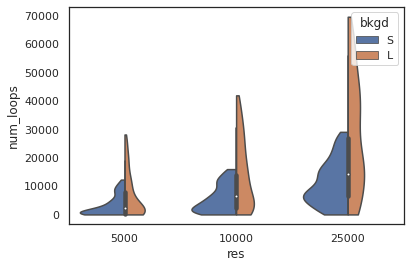

In [87]:
for res in [5000, 10000, 25000]:
    for bg in ["S", "L"]:
        print(res, bg)
        temp = chipseq_hg38_arr_nonzero.loc[chipseq_hg38_arr_nonzero["res"] == res]
        temp_1 = temp.loc[temp["bkgd"] == bg]
        print(len(temp_1))
ax = sns.violinplot(data=chipseq_hg38_arr_nonzero, x="res", y="num_loops", hue="bkgd", split=True, cut=0)

5000 S
204
5000 L
196
10000 S
211
10000 L
202
25000 S
219
25000 L
221


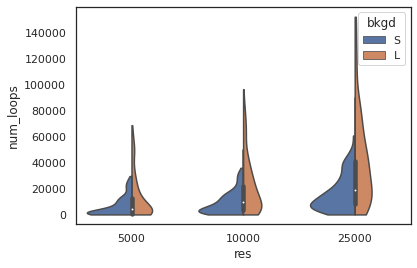

In [80]:
for res in [5000, 10000, 25000]:
    for bg in ["S", "L"]:
        print(res, bg)
        temp = chipseq_hg38_arr_nonzero.loc[chipseq_hg38_arr_nonzero["res"] == res]
        temp_1 = temp.loc[temp["bkgd"] == bg]
        print(len(temp_1))
ax = sns.violinplot(data=chipseq_hg38_arr_nonzero, x="res", y="num_loops", hue="bkgd", split=True, cut=0)

#### get indices for biorep merged with chipseq

In [121]:
samplesheet_human = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/human.biorep_merged.samplesheet.without_header.tsv"
samplesheet_mouse = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/mouse.biorep_merged.samplesheet.without_header.tsv"

In [122]:
def get_index(sample, samplesheet):
    with open(samplesheet) as s:
        count = 1
        for line in s:
            info = line.strip().split("\t")
            if info[0] == sample:
                return str(count)
            count = count + 1

In [123]:
path = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/human_biorep_merged.peaks_files.samplesheet.without_header.tsv"
path = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/human_t2t_biorep_merged.peaks_files.samplesheet.without_header.tsv"
path = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/mouse_biorep_merged.peaks_files.samplesheet.without_header.tsv"

In [124]:
peaks_hg38 = pd.read_csv(path, sep="\t", header=None)

In [125]:
cp = peaks_hg38.loc[peaks_hg38[4].str.contains("mnt")]

In [126]:
cp["idx"] = cp.apply(lambda x : get_index(x[0], samplesheet_mouse), axis = 1)

/tmp/ipykernel_96766/3692852945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp["idx"] = cp.apply(lambda x : get_index(x[0], samplesheet_mouse), axis = 1)


In [129]:
len(cp)

13

In [114]:
(",").join(cp.idx.to_list())

'1,2,3,12,13,14,15,16,17,18,19,20,21,22,23,30,31,32,43,44,45,47,48,49,50,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,70,71,72,73,74,75,76,77,93,94'

In [128]:
(",").join(cp.idx.to_list())

'1,2,5,6,7,8,25,26,28,30,38,39,62'